In [16]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
import requests
import sys
import os

import numpy as np

import datetime

import pickle

import time

import networkx
from collections import defaultdict
from glob import glob

import seaborn as sb
from IPython.display import display
from plotnine import *
import plotnine
import pandas as pd
import matplotlib

plotnine.options.dpi = 100

In [17]:
def read_pickle(pickle_path):
    all_elements = []
    with open(pickle_path,'rb') as o:
        try:
            while True:
                all_elements.append(pickle.load(o))
        except:
            pass
    return all_elements

def get_all_authors_detailed(channel_dict):
    output = {}
    for video in channel_dict:
        this_video_output = {
            'main':defaultdict(lambda: {'name':'','count':0}),
            'replies':defaultdict(lambda: {'name':'','count':0})}
        comments = video['comments']
        for comment in comments:
            comment_author = comment['main']['author']
            comment_url = comment['main']['url']
            this_video_output['main'][comment_url]['name'] = comment_author
            this_video_output['main'][comment_url]['count'] += 1
            for reply in comment['replies']:
                reply_author = reply['author']
                reply_url = reply['url']
                this_video_output['replies'][reply_url]['name'] = reply_author
                this_video_output['replies'][reply_url]['count'] += 1
        output[video['title'],video['url']] = this_video_output
    return output

def get_all_authors(channel_dict):
    output = defaultdict(lambda: {'name':'','count':0})
    for video in channel_dict:
        comments = video['comments']
        for comment in comments:
            comment_author = comment['main']['author']
            comment_url = comment['main']['url']
            output[comment_url]['name'] = comment_author
            output[comment_url]['count'] += 1
            for reply in comment['replies']:
                reply_author = reply['author']
                reply_url = reply['url']
                output[reply_url]['name'] = reply_author
                output[reply_url]['count'] += 1
                
    return output

In [18]:
all_pickle_files = glob('*pkl')

all_author_lists = {
    x:get_all_authors(read_pickle(x)) for x in all_pickle_files}

In [19]:
checked = []
more_than_one = defaultdict(set)
all_authors = set()
for x in all_author_lists:
    for author in all_author_lists[x]:
        more_than_one[author].add(x)
        all_authors.add(author)

## O grande panorama da direita portuguesa no Youtube - considerações enquanto população estática

A análise inicial destes números (**Fig. 1**) revela algo que não esperava - a esmagadora maioria dos comentadores não existe enquanto comentador em mais nenhum canal. Imediatamente isto tornou-se estranho, mas a trama só se adensa quando verificamos que é o canal Talk About em Português (TAeP), canal pessoal do Sr. Macedo, que destoa claramente do resto, com a esmagadora maioria dos comentadores e uma proporção elevadíssima de comentadores exclusivos (**Fig. 2** e **Fig. 5**).

A análise do TAeP fica numa subsecção dedicada mais em baixo nesta secção.

Uma parte considerável dos comentadores comenta em mais do que um canal - a proporção de comentadores exclusivos é, excluindo o TAeP com 0.91, entre $0.253$ (DefesaDeHonra) e $0.594$ (CHEGA) (**Fig. 3**). $15092$ comentadores comentam em mais do que um canal para um total de $41480$, o que corresponde a $36\%$ de comentadores não-exclusivos. 

Contudo, removendo TAeP, que representa, simultaneamente, o canal com o maior número de comentadores e comentadores exclusivos, este panorama muda para $25899$ comentadores, dos quais $12204$ são exclusivos ($47\%$). Isto torna o contributo do TAeP considerável e muito suspeito.

### TAeP e a obsessão transatlântica

Apesar de não ser imediatamente evidente, um simples facto torna esta audiência grande e única do TAeP em algo óbvio - a sua obsessão com o comentário e a "análise" do panorama político brasileiro (**Fig. 4**). Vídeos a defender a honra de Bolsonaro, do seu governo ou de figuras da direita brasileira, a denegrir elementos da esquerda brasileira (Jean Wyllys parece um favorito neste aspecto), ou a defender a honra de Portugal contra canais brasileiros. Sem me querer referir demasiado ao conteúdo dos vídeos, TAeP tenta refutar a imagem que a imprensa cria de Bolsonaro enquanto "mau da fita", tentando minorizar os seus erros crassos e distorcer a realidade de modo a transformar a imagem de um governador péssimo e destilador de ódio numa vítima da maledicência. Em números próprios, se usarmos um filtro grosseiro para classificar vídeos como sobre o Brasil ou não, constatamos que $16784$ dos $28971$ comentários totais existem dentro destes vídeos, sendo que os vídeos sobre o Brasil atingem em média mais de $200$ comentários, humilhando a média para o canal sem fazer esta distinção de $73$ comentários por vídeo (sem os seus vídeos sobre o Brasil, que atraem uma demografia considerável, TAeP ficaria reduzido a menos de $40$ comentários por vídeo).

### O sucesso do CHEGA

O enorme sucesso do CHEGA no que toca a comentários foca-se num número relativamente reduzido de comentadores extremamente dedicados. De facto e de acordo com a **Fig. 5A**, podemos observar que 20% de todos os comentários são feitos pelos 38 comentadores mais frequentes, com quase 3% (mais de 2000 comentários) a virem de [Patrícia Santos](https://www.youtube.com/channel/UC8xoa-AilLkYeQdxr4ZXiiQ/about), conta misteriosa com alguns subscriptores mas sem conteúdo. Vale ainda a pena referir que $30\%$ dos comentários são feitos por menos de $1\%$ dos comentadores (**Fig. 7**) e que estes poucos prolíficos dedicam-se principalmente a extensas batalhas na secção de comentários, com grande parte da contribuição que lhes é devida a figurar enquanto respostas a comentários (**Fig. 5B e 5C**). 

### Amores cruzados 

*__Nota__: esta análise não contempla mudanças que possam ocorrer ao longo do tempo, tais como migrações de comentadores de um canal para o outro. A demografia destes canais é considerada, por enquanto, como uma população estática. Mais à frente iremos analisar possíveis padrões de migração entre canais. Como tal, o facto de dois quaisquer canais terem, nesta análise, comentadores em comum pode dever-se a 1) comentários síncronos ou 2) migração do interesse político de um partido para outro. Como tal, nesta secção não serão tecidas considerações sobre possíveis migrações*

A **Fig. 8** tenta mostrar algo que devia existir em mais dimensões - é uma visão simplificada de quem comentou em mais do que um sítio. Na diagonal que corresponde à identidade (IL-IL, por exemplo) temos o número total de comentadores e os restantes quadrados representam de uma forma mais ou menos intuitiva o quão promíscuos são os seguidores dessa página. Populações em canais como o do CDS-PP, que partilha sensivelmente um quarto e um terço com o CHEGA e com a Iniciativa Liberal, respectivamente, podem ser ambos indicativos de alguma perde de interesse no CDS-PP por parte de alguns votantes, contudo também pode representar a existência de *trolls* de qualquer um dos lados a tentar acossar o outro. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


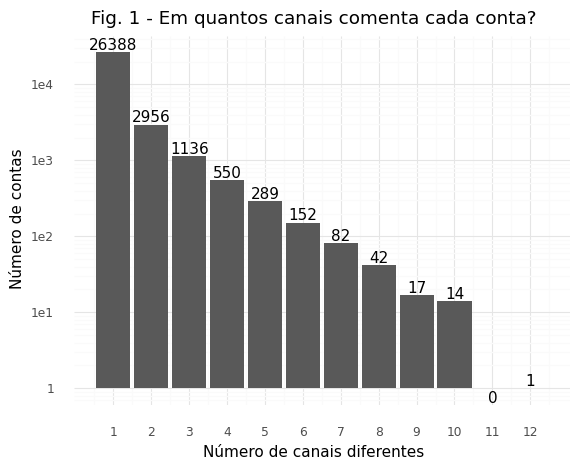

<ggplot: (-9223363269592759678)>

In [20]:
count_dict = [0 for i in range(len(all_pickle_files))]
for x in more_than_one:
    count_dict[len(more_than_one[x])-1] += 1
(
    ggplot(
        data=pd.DataFrame.from_dict({
            'x':[i for i in range(1,len(all_pickle_files)+1)],
            'y':[x for x in count_dict]}),
        mapping=aes(x="x",y="y",label="y")) + 
    geom_bar(stat="identity") + 
    geom_text(vjust="bottom") + 
    theme_minimal() + 
    scale_x_continuous(breaks=[x for x in range(1,len(all_pickle_files)+1)]) + 
    scale_y_continuous(trans='log10') + 
    ylab("Número de contas") + 
    xlab("Número de canais diferentes") + 
    ggtitle("Fig. 1 - Em quantos canais comenta cada conta?")
)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_bar : Removed 1 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


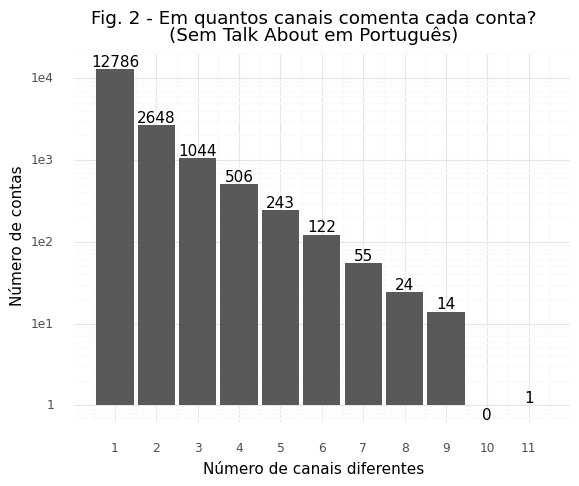

<ggplot: (-9223363269591858663)>

In [21]:
count_dict = [0 for i in range(len(all_pickle_files))]
for x in more_than_one:
    count_dict[len([x for x in more_than_one[x] if "Macedo" not in x])-1] += 1
(
    ggplot(
        data=pd.DataFrame.from_dict({
            'x':[i for i in range(1,len(all_pickle_files)+1)][:-1],
            'y':[x for x in count_dict][:-1]}),
        mapping=aes(x="x",y="y",label="y")) + 
    geom_bar(stat="identity") + 
    geom_text(vjust="bottom") + 
    theme_minimal() + 
    scale_x_continuous(breaks=[x for x in range(1,len(all_pickle_files)+1)]) + 
    scale_y_continuous(trans='log10') + 
    ylab("Número de contas") + 
    xlab("Número de canais diferentes") + 
    ggtitle("Fig. 2 - Em quantos canais comenta cada conta?\n(Sem Talk About em Português)")
)


    Total de comentadores (sem TAeP): 41480 (25899)
    Total de comentadores exclusivos (sem TAeP): 26388 (12204)
    


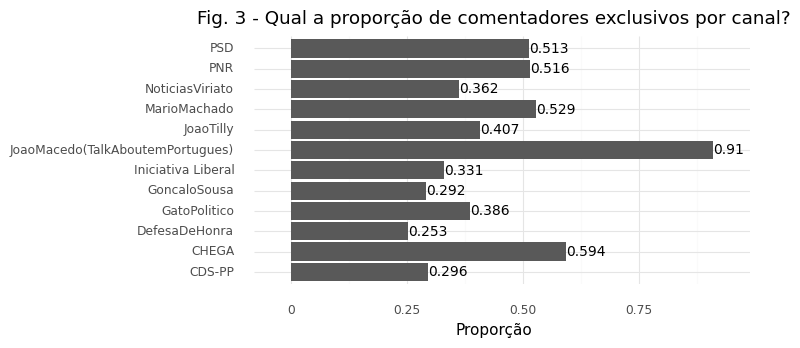

<ggplot: (8767235527944)>

In [22]:
exclusive_commenters = defaultdict(int)
total_commenters = defaultdict(int)
for x in more_than_one:
    if len(more_than_one[x]) == 1:
        exclusive_commenters[list(more_than_one[x])[0]] += 1
    for y in more_than_one[x]:
        total_commenters[y] += 1
    
plot_dict = {"Total":[],"Exclusive":[],"Channel":[]}
for channel in total_commenters:
    plot_dict["Total"].append(total_commenters[channel])
    plot_dict["Exclusive"].append(exclusive_commenters[channel])
    plot_dict["Channel"].append(channel[:-4])
    
plot_dict["Fraction"] = [
    round(x/y,3) for x,y in zip(plot_dict["Exclusive"],plot_dict["Total"])]
    
total = np.sum([x for x in plot_dict['Total']])
exclusive = np.sum([x for x in plot_dict['Exclusive']])
total_no_macedo = 0
exclusive_no_macedo = 0
for t,e,c in zip(plot_dict["Total"],plot_dict["Exclusive"],plot_dict["Channel"]):
    if 'Macedo' not in c:
        total_no_macedo += t
        exclusive_no_macedo += e

print(
    """
    Total de comentadores (sem TAeP): {} ({})
    Total de comentadores exclusivos (sem TAeP): {} ({})
    """.format(total,total_no_macedo,exclusive,exclusive_no_macedo)
)
(
    ggplot(pd.DataFrame.from_dict(plot_dict),
           aes(x="Channel",y="Fraction",label="Fraction")) + 
    geom_bar(stat="identity") + 
    coord_flip() + 
    theme_minimal() + 
    geom_text(hjust='left',
              color='black',
              size=10) +
    xlab("") + 
    ylab("Proporção") + 
    scale_y_continuous(expand = [0,0.08]) +
    ggtitle("Fig. 3 - Qual a proporção de comentadores exclusivos por canal?") + 
    theme(aspect_ratio=0.5)
)


    Comentários em vídeos sobre o Brasil (número de comentários/vídeo): 16784.0 (202.21686746987953)
    Comentários em vídeos sobre outros tópicos (número de comentários/vídeo): 12190.0 (38.82165605095541)
    Comentários totais (número de comentários/vídeo): 28974.0 (72.9823677581864)
    


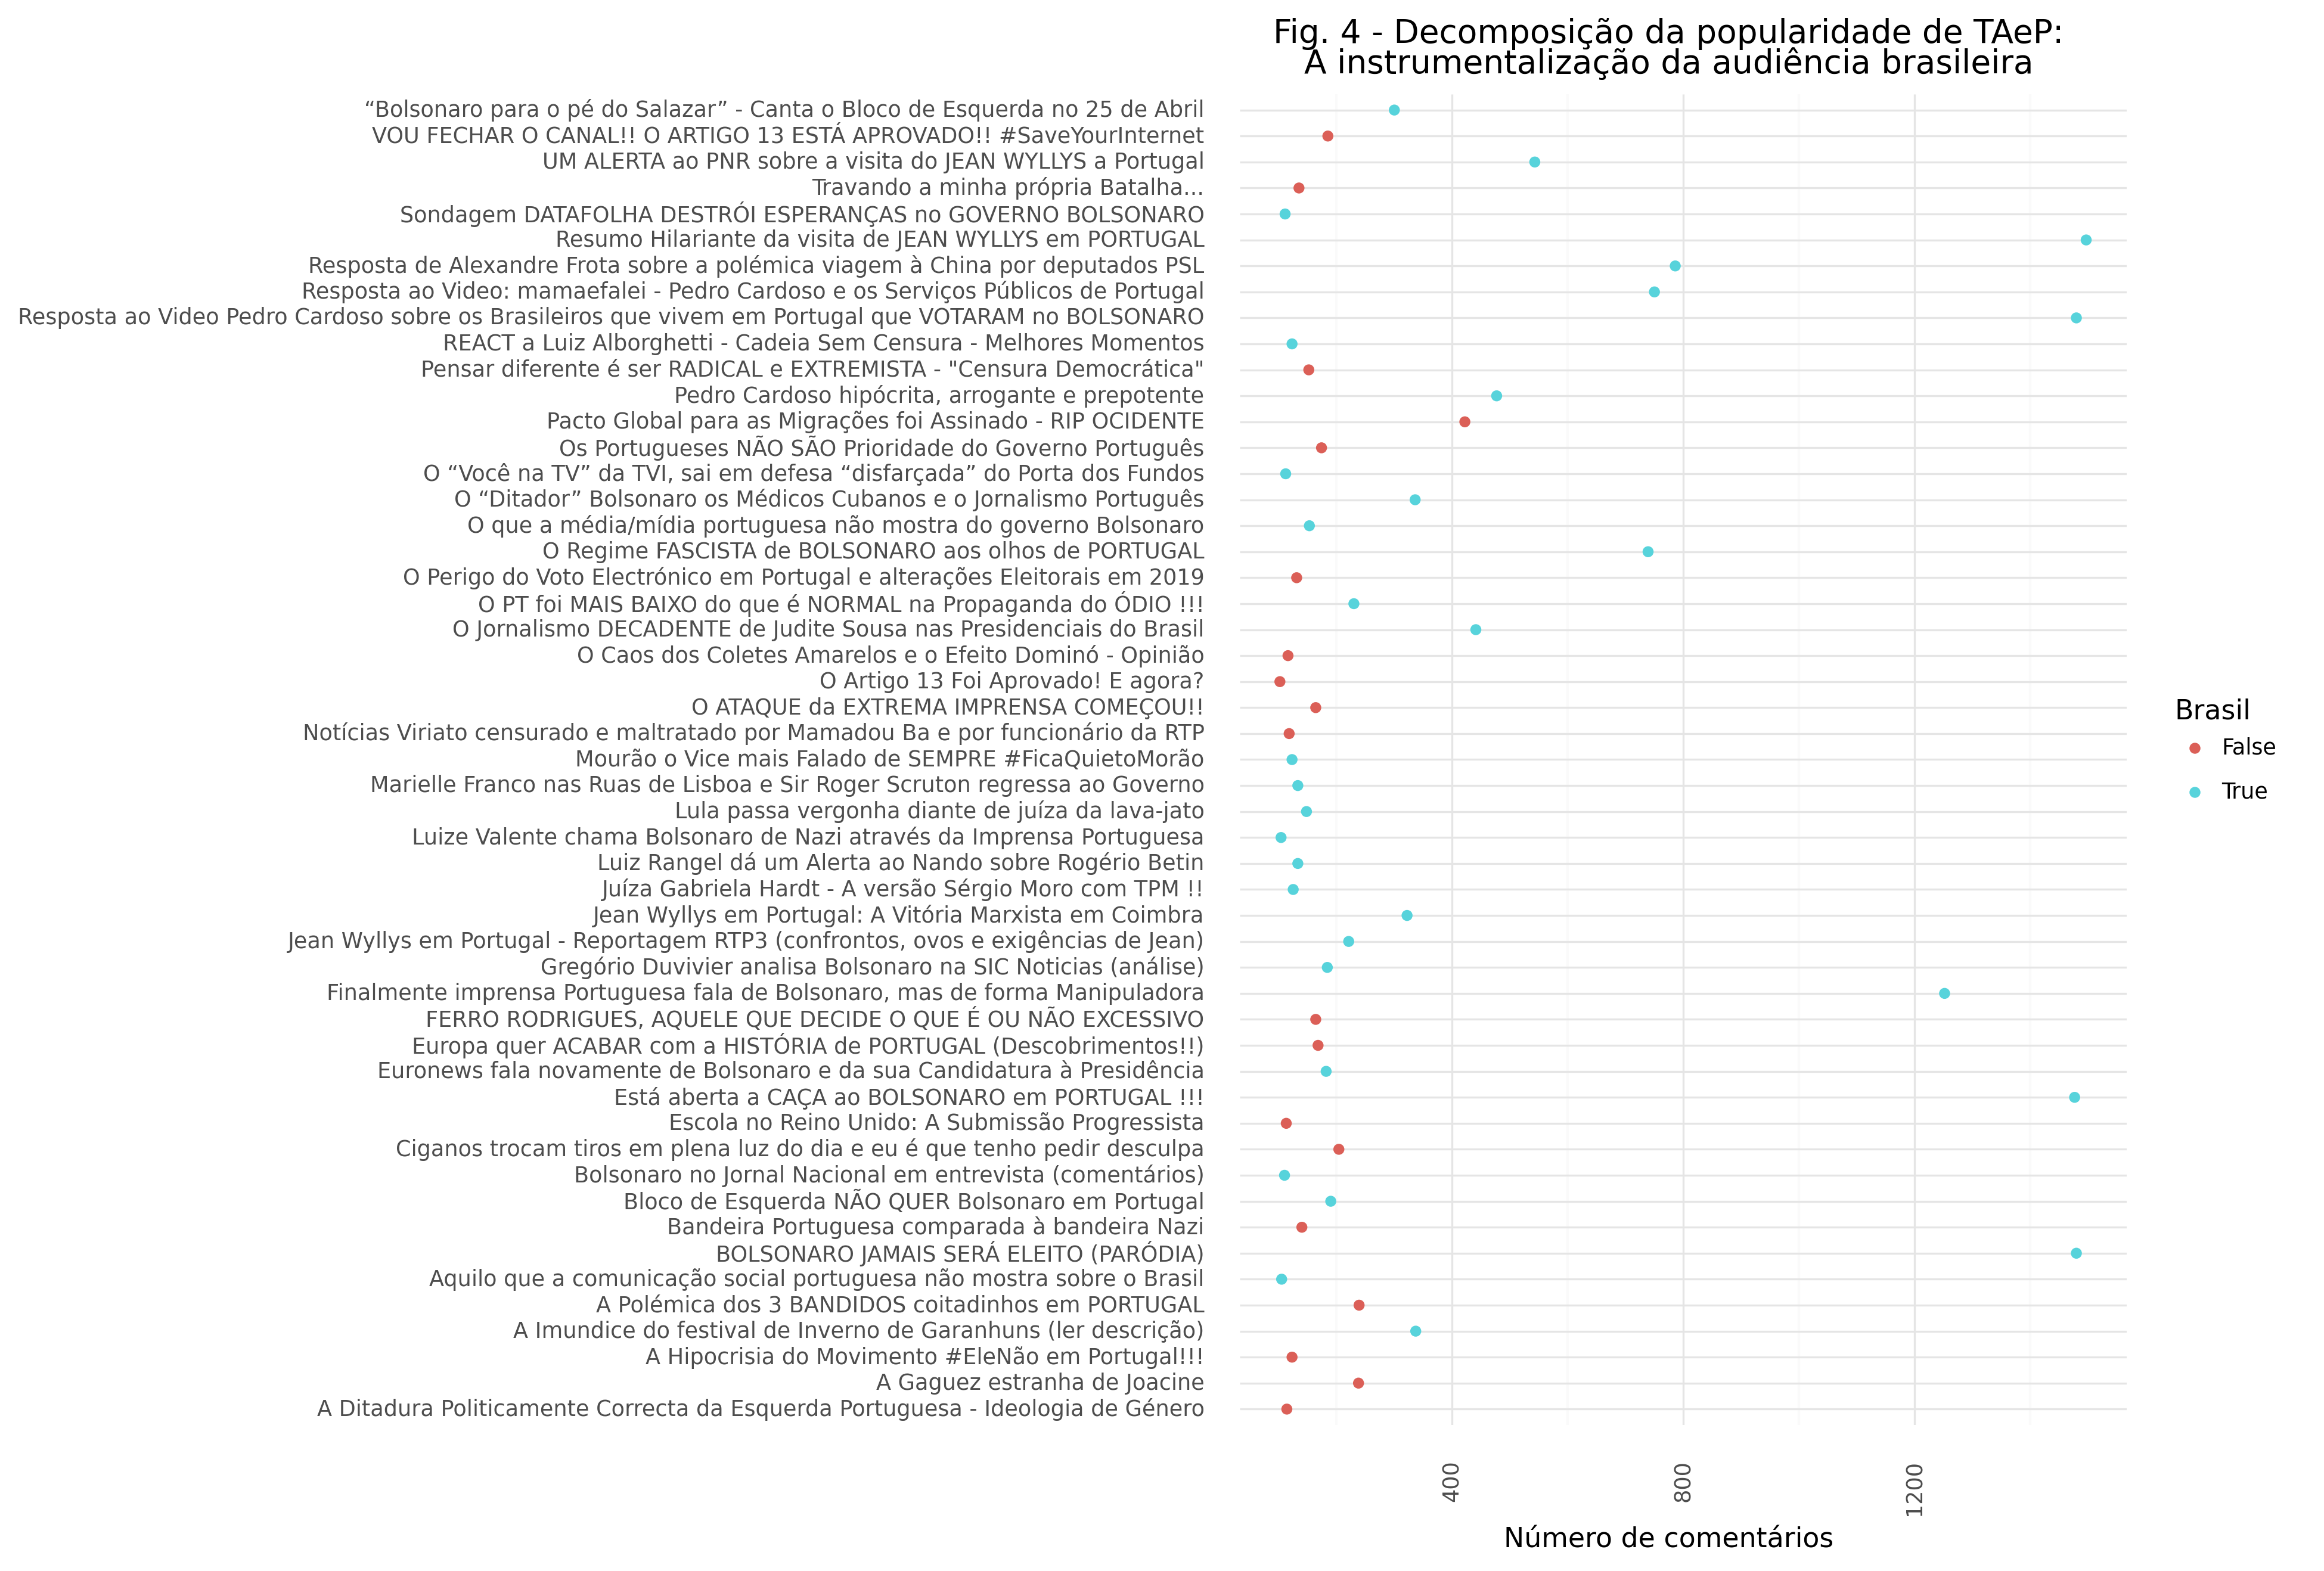

<ggplot: (-9223363269588228650)>

In [23]:
def check_if_brasil(text):
    text = text.lower()
    terms = [' pt ','bolsonaro','psl',
             'alexandre frota',
             'pedro cardoso','duvivier','garanhuns',
             'wyllys','brasil','betin','sérgio moro',
             'alborghetti','morão','marielle franco','lula',
             'mensageiros da profecia','porta dos fundos']
    for term in terms:
        if term in text:
            return True
    return False

all_authors_detailed_macedo = get_all_authors_detailed(
    read_pickle('JoaoMacedo(TalkAboutemPortugues).pkl'))

video_details_macedo = {
    x:[
        np.sum([all_authors_detailed_macedo[x]['main'][y]['count'] for y in all_authors_detailed_macedo[x]['main']]),
        np.sum([all_authors_detailed_macedo[x]['replies'][y]['count'] for y in all_authors_detailed_macedo[x]['replies']])
    ] for x in all_authors_detailed_macedo
}

plot_dict = {"title":[],"url":[],"main":[],"replies":[]}
for video in video_details_macedo:
    plot_dict['title'].append(video[0])
    plot_dict['url'].append(video[1])
    plot_dict['main'].append(video_details_macedo[video][0])
    plot_dict['replies'].append(video_details_macedo[video][1])
    
plot_df = pd.DataFrame.from_dict(plot_dict)

plot_df = plot_df.sort_values("main",ascending=False)

plot_df["Brasil"] = [check_if_brasil(x) for x in plot_df['title']]

print(
    """
    Comentários em vídeos sobre o Brasil (número de comentários/vídeo): {} ({})
    Comentários em vídeos sobre outros tópicos (número de comentários/vídeo): {} ({})
    Comentários totais (número de comentários/vídeo): {} ({})
    """.format(
        np.sum(plot_df[plot_df["Brasil"] == True]["main"]),
        np.sum(plot_df[plot_df["Brasil"] == True]["main"])/len(plot_df[plot_df["Brasil"] == True]["main"]),
        np.sum(plot_df[plot_df["Brasil"] == False]["main"]),
        np.sum(plot_df[plot_df["Brasil"] == False]["main"])/len(plot_df[plot_df["Brasil"] == False]["main"]),
        np.sum(plot_df["main"]),
        np.sum(plot_df["main"])/len(plot_df["main"]))
)

(
    ggplot(plot_df[plot_df['main'] > 100],aes(x="title",y="main",color = 'Brasil')) + 
    geom_point() + 
    theme_minimal() +
    theme(axis_text_x=element_text(angle=90,hjust=0.5),
          aspect_ratio=1.5) + 
    coord_flip() + 
    ylab("Número de comentários") +
    xlab("") + 
    ggtitle("Fig. 4 - Decomposição da popularidade de TAeP:\nA instrumentalização da audiência brasileira") + 
    theme(dpi=300)
)

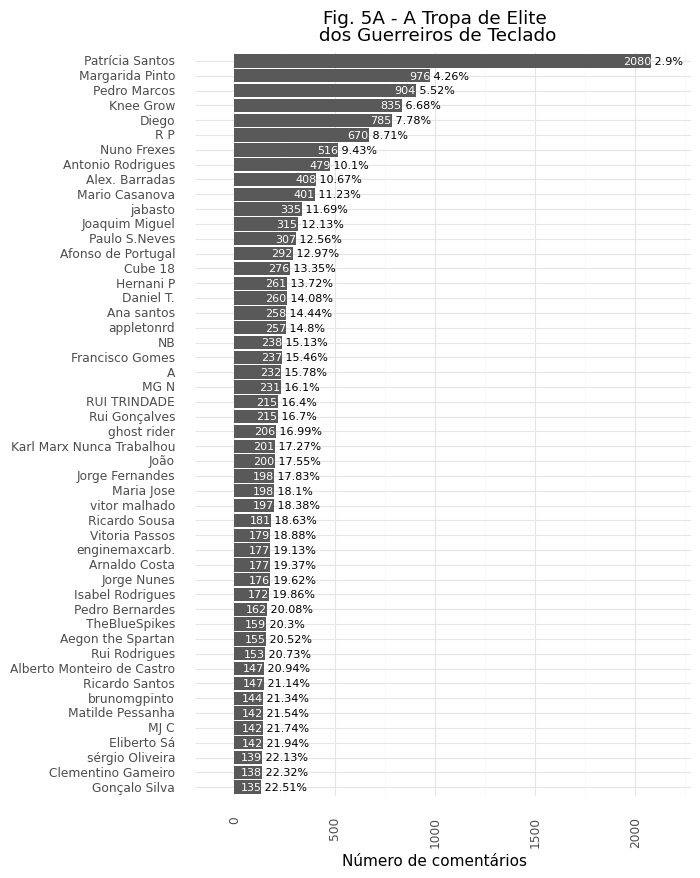

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128226 missing f

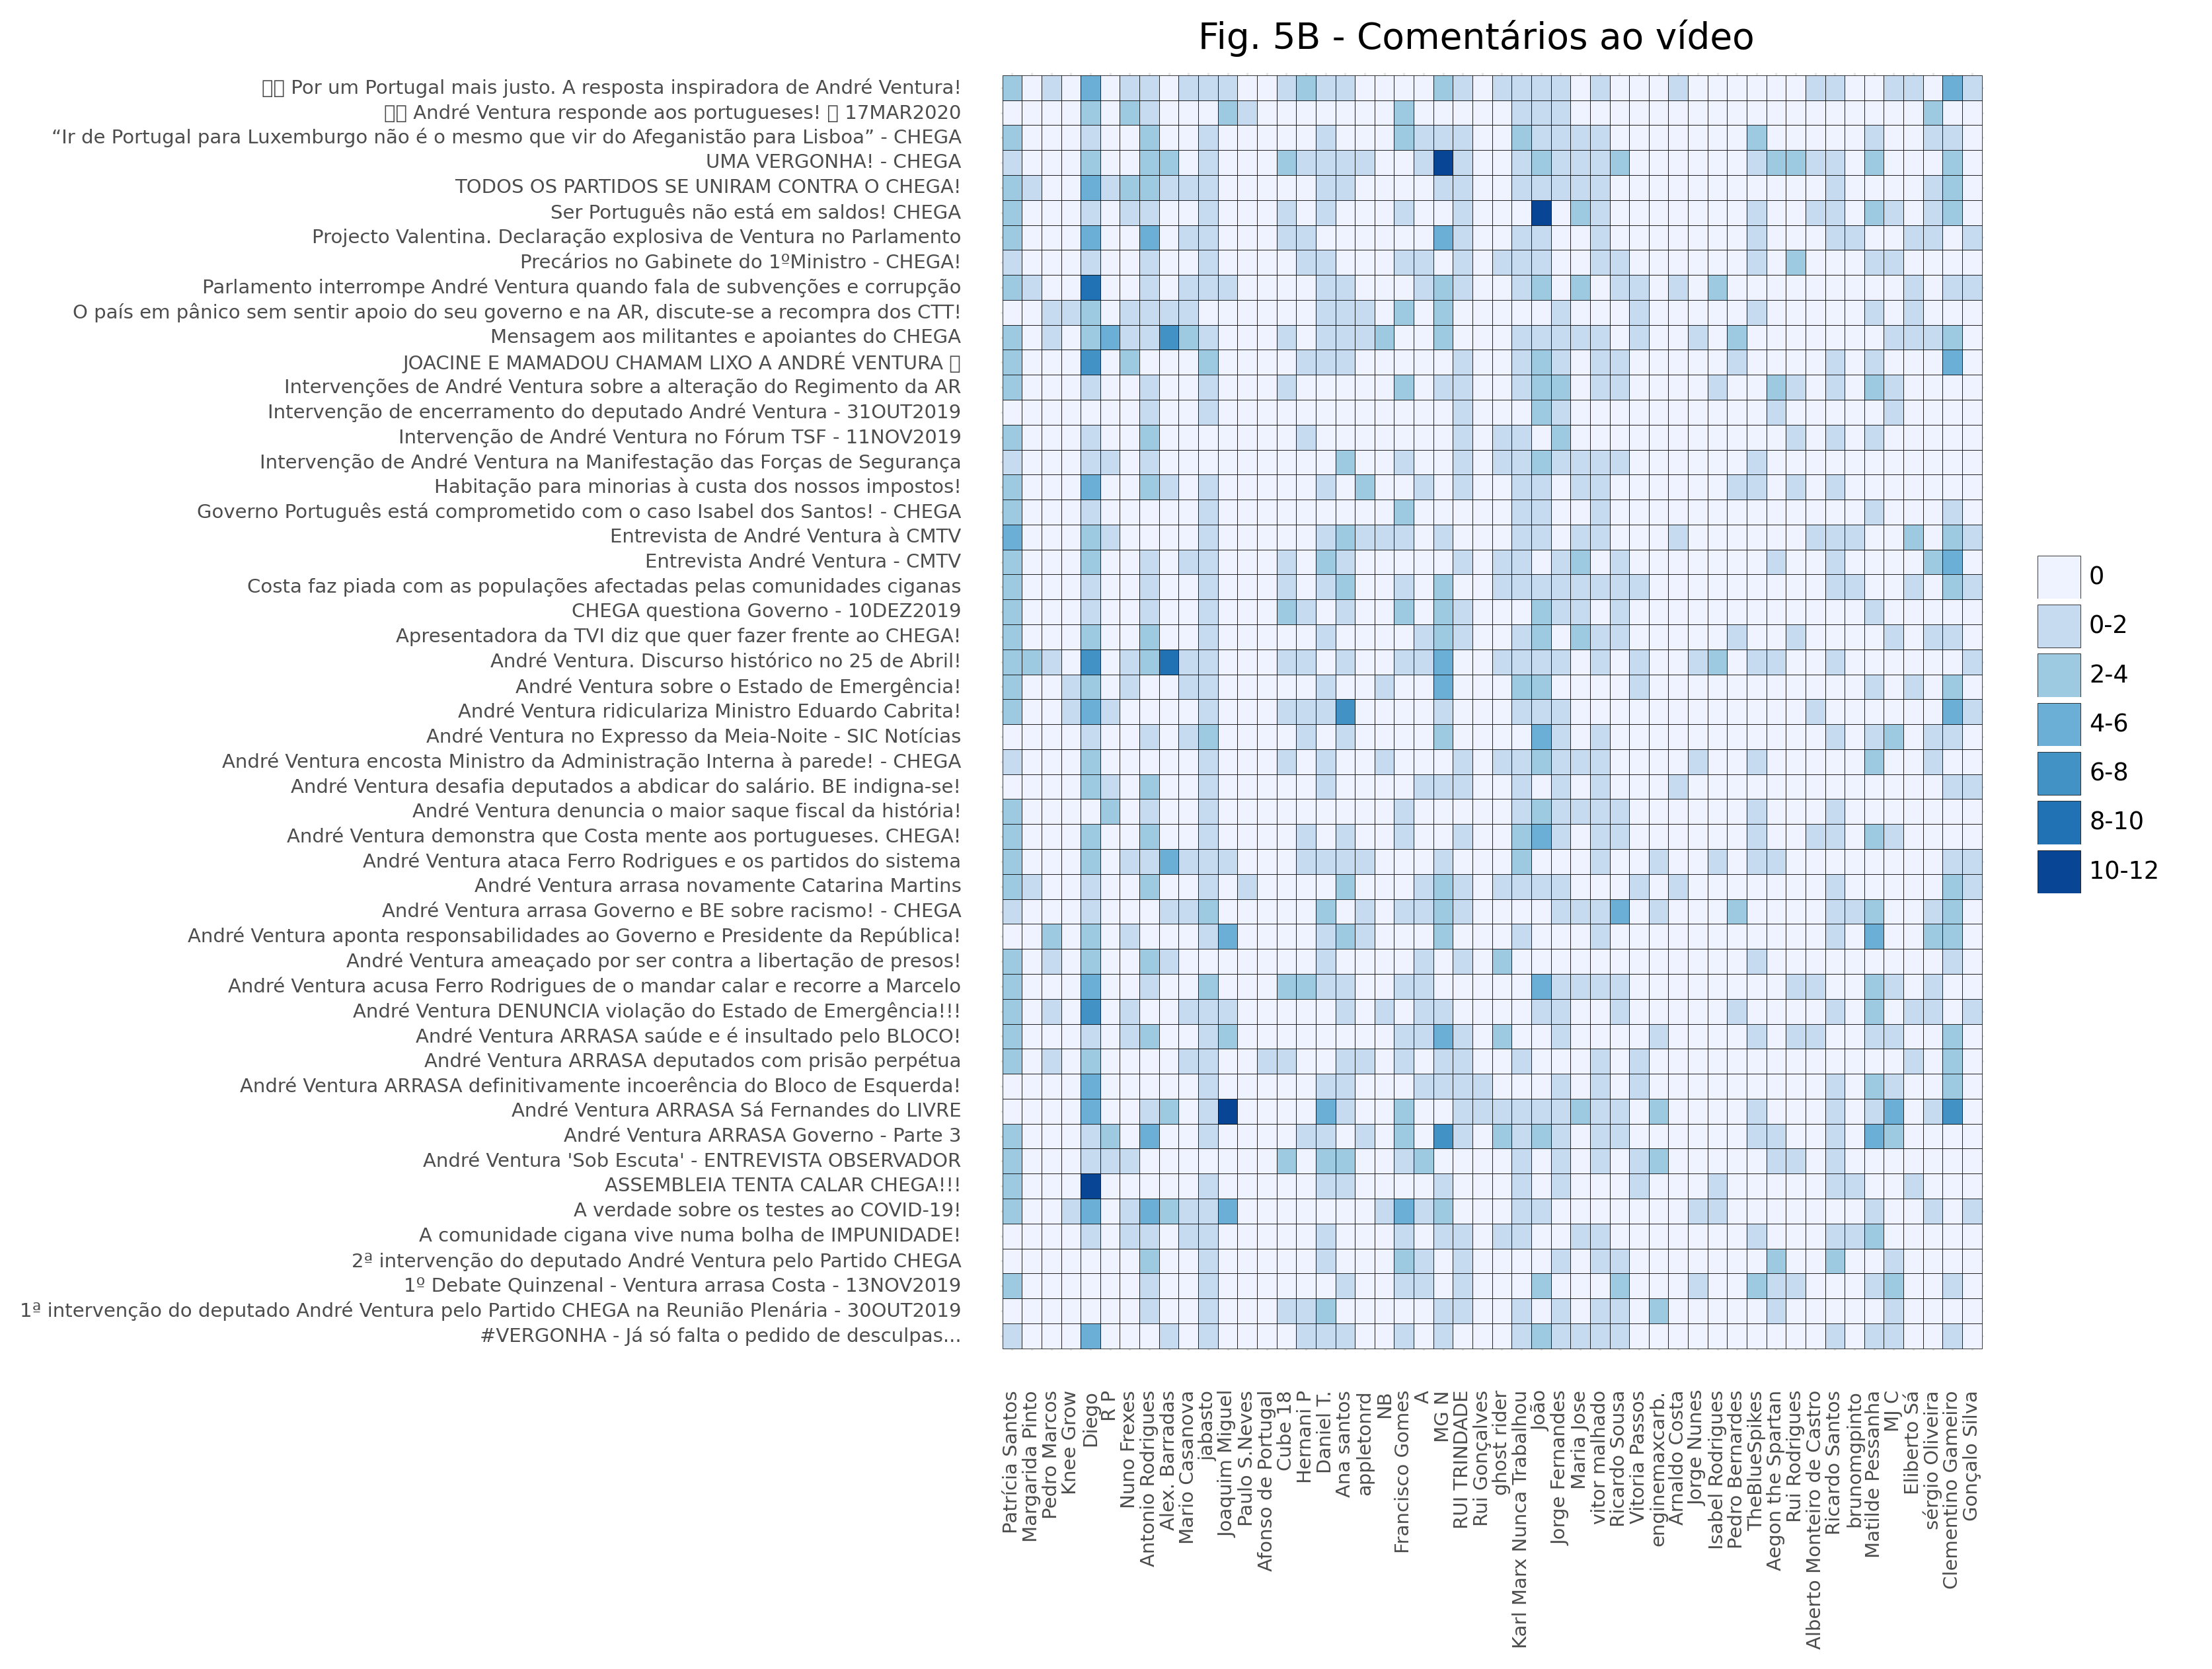

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128226 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127477 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127481 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128338 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128226 missing f

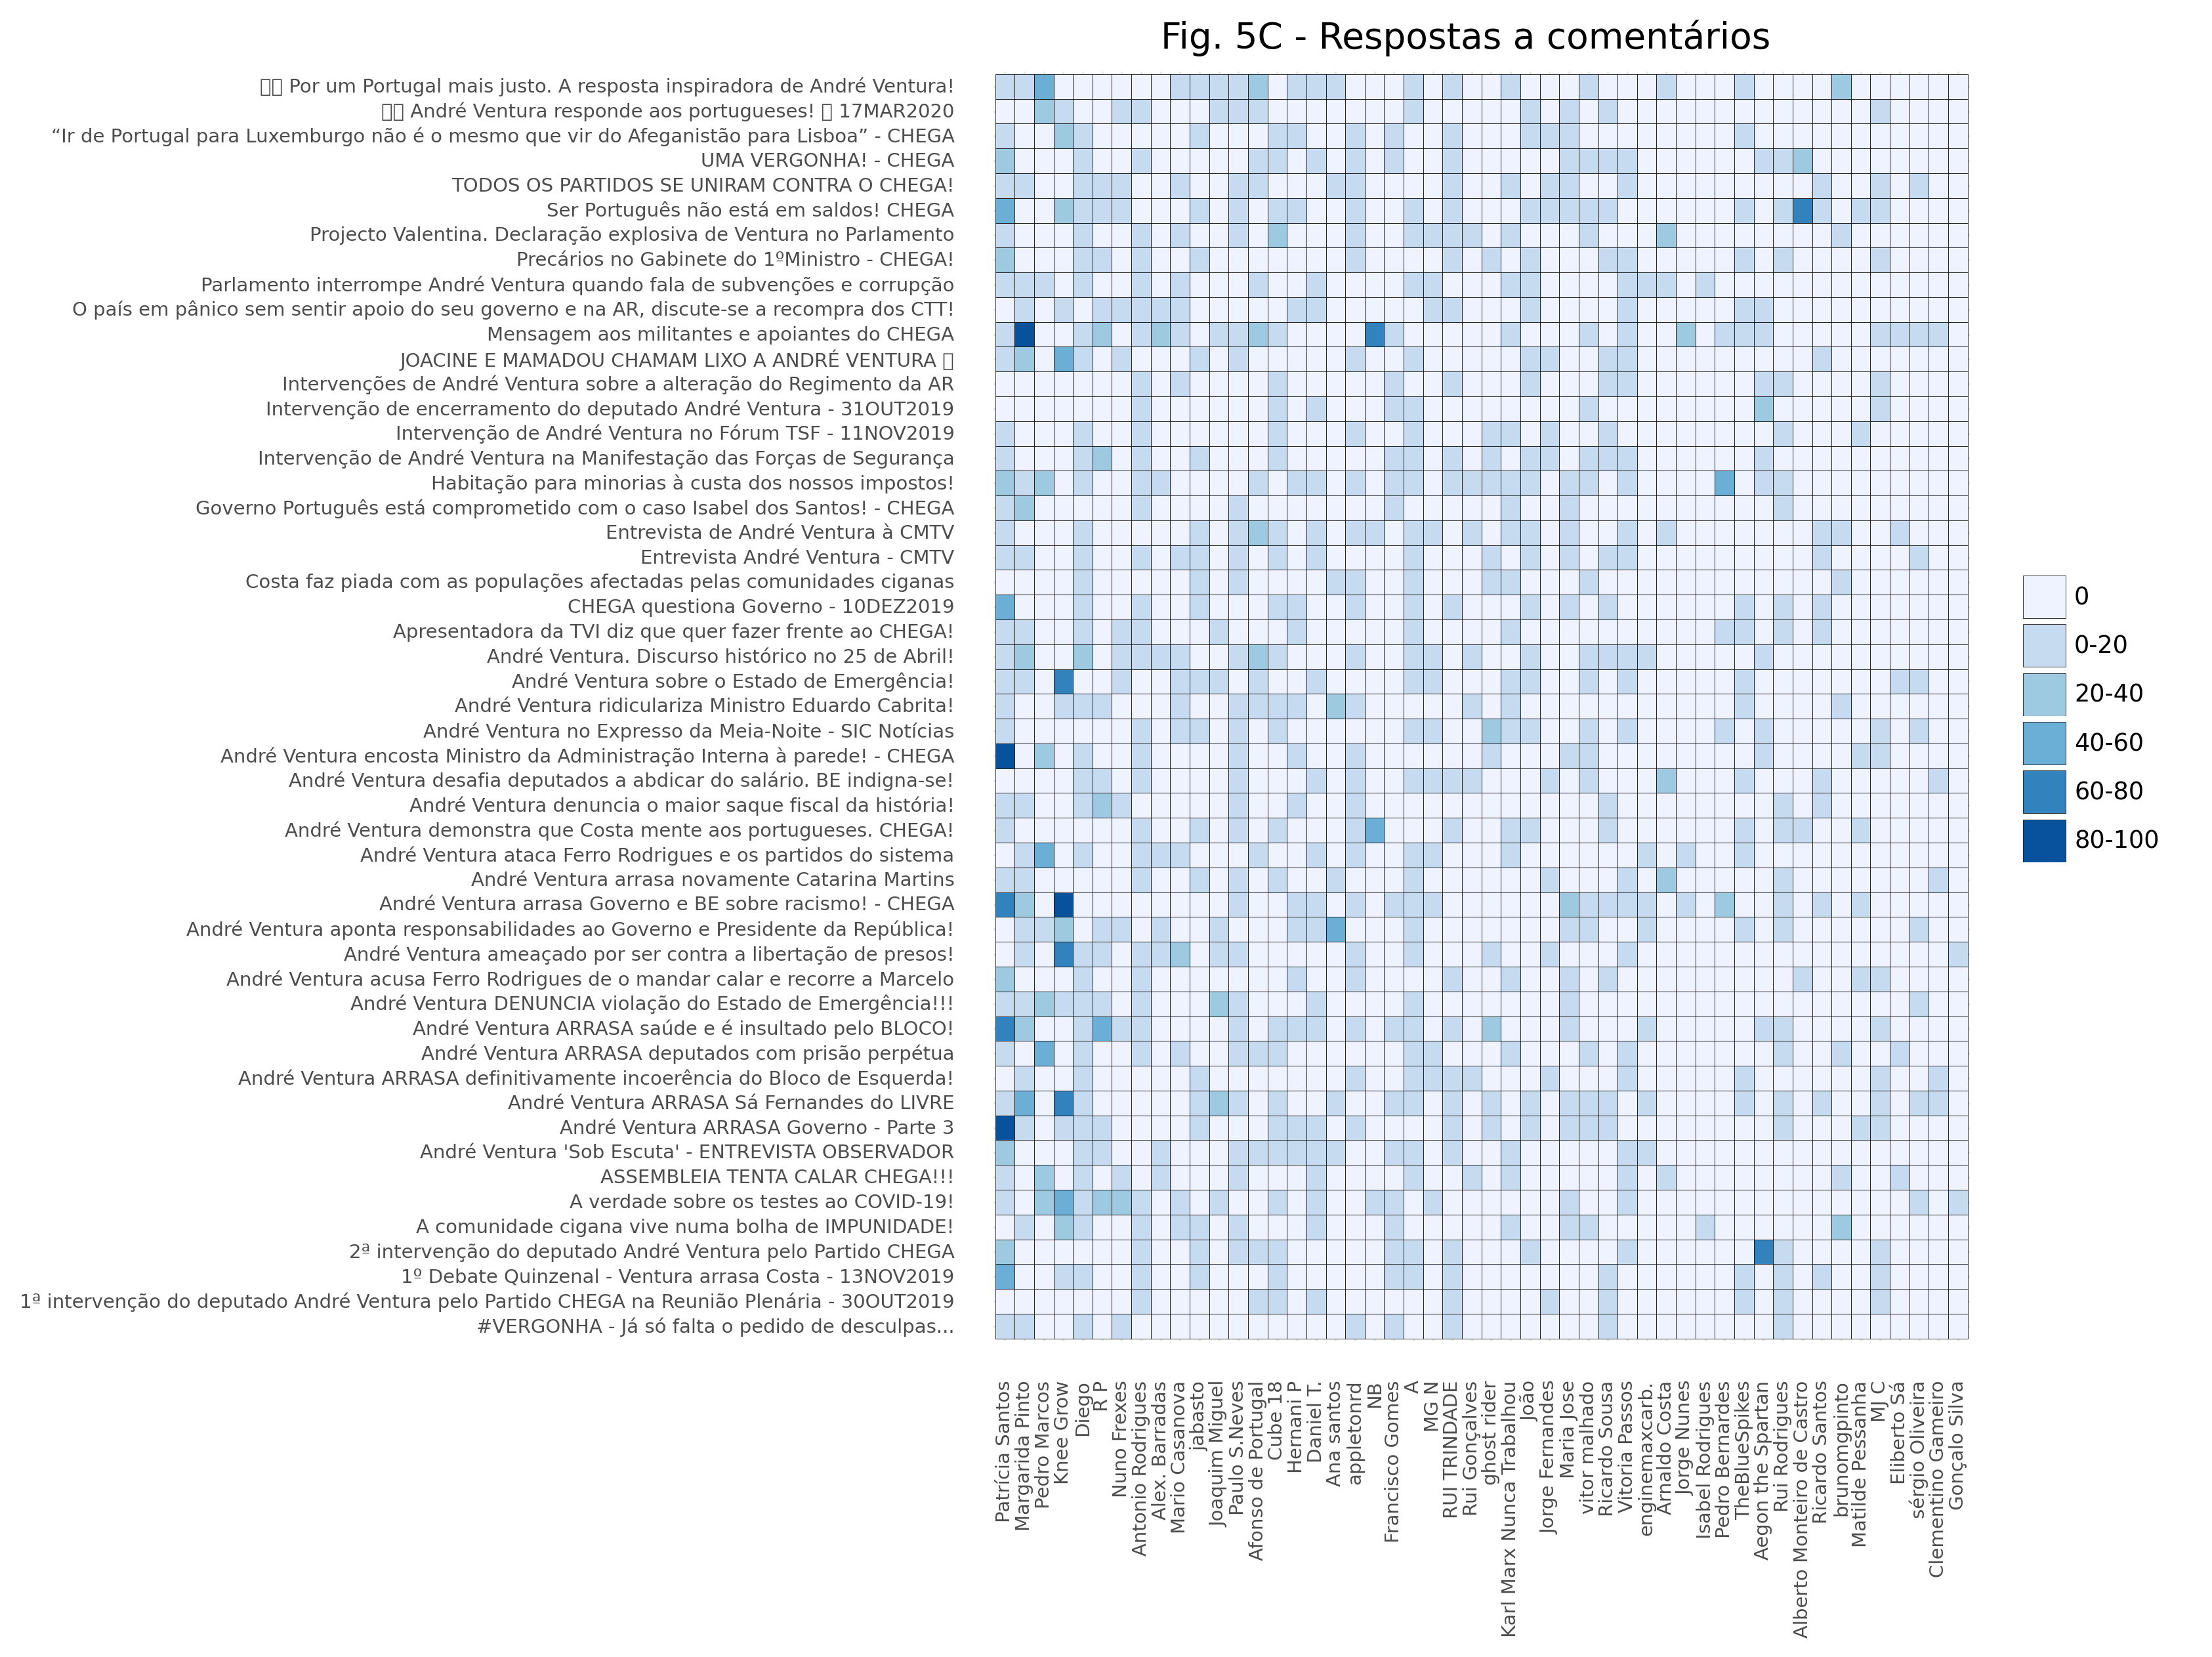

[<ggplot: (-9223363269588027069)>,
 <ggplot: (-9223363269589228656)>,
 <ggplot: (8767264835062)>]

In [24]:
authors_name = []
authors_count = []

for c in all_author_lists["CHEGA.pkl"]:
    authors_name.append(all_author_lists["CHEGA.pkl"][c]['name'])
    authors_count.append(all_author_lists["CHEGA.pkl"][c]['count'])

chega_authors_df = pd.DataFrame.from_dict({
    'name':authors_name,
    'count':authors_count,
    'url':list(all_author_lists["CHEGA.pkl"].keys())
})

total_comments = np.sum(chega_authors_df['count'])

chega_authors_df = chega_authors_df.sort_values('count',ascending=False)
chega_authors_df["prop"] = np.round(np.cumsum([
    x/total_comments*100 for x in chega_authors_df["count"]
]),2)
chega_authors_df["prop"] = [
    ' {}%'.format(x) for x in chega_authors_df["prop"]
]

top_50_urls = chega_authors_df.iloc[0:50,]['url'].to_list()
top_50_names = chega_authors_df.iloc[0:50,]['name'].to_list()

chega_videos = get_all_authors_detailed(read_pickle('CHEGA.pkl'))

M = 0
plot_dict = {
    'url':[],
    'name':[],
    'video':[],
    'count_main':[],
    'count_replies':[]
}
for title,url in chega_videos:
    if (len(chega_videos[title,url]['main']) + len(chega_videos[title,url]['replies'])) > 250:
        for author_url,author_name in zip(top_50_urls,top_50_names):
            plot_dict['url'].append(author_url)
            plot_dict['name'].append(author_name.encode().decode('utf-8','ignore'))
            plot_dict['video'].append(title.encode().decode('utf-8','ignore'))
            if author_url in chega_videos[title,url]['main']:
                plot_dict['count_main'].append(chega_videos[title,url]['main'][author_url]['count'])
            else:
                plot_dict['count_main'].append(0)
            if author_url in chega_videos[title,url]['replies']:
                plot_dict['count_replies'].append(chega_videos[title,url]['replies'][author_url]['count'])
            else:
                plot_dict['count_replies'].append(0)

ranges = {
    'count_total':25,
    'count_main':2,
    'count_replies':20
}

plot_df = pd.DataFrame.from_dict(plot_dict)
plot_df['count_total'] = plot_df['count_main'] + plot_df['count_replies']
category_scales = {}
for c_id in ['count_total','count_main','count_replies']:
    R = ranges[c_id]
    category_scales[c_id] = [0] + [
        '{}-{}'.format(x*R,x*R+R) for x in range(
            int(np.floor(plot_df[c_id]/R).min()),
            int(np.floor(plot_df[c_id]/R).max()))]
    c_id_f = '{}_factor'.format(c_id)
    tmp = []
    for x in plot_df[c_id]:
        if x != 0:
            x = int(np.floor(x/R)*R)
            x = '{}-{}'.format(x,x+R)
        else:
            x = 0
        tmp.append(x)
    plot_df[c_id_f] = tmp
    
plots = [
    (
        ggplot(chega_authors_df.iloc[0:50,:],
               aes(x = 'name',y = 'count',label='count')) + 
        geom_bar(stat='identity') +
        geom_text(size=8,hjust='right',color='white') +
        geom_text(aes(label='prop'),size=8,hjust='left') +
        scale_x_discrete(limits=top_50_names[::-1]) + 
        scale_y_continuous(expand=[0.095,0]) + 
        theme_minimal() +
        theme(axis_text_x = element_text(angle=90,hjust=0.5),
              aspect_ratio=1.5) + 
        ylab("Número de comentários") +
        xlab("") + 
        coord_flip() + 
        ggtitle("Fig. 5A - A Tropa de Elite\n dos Guerreiros de Teclado")
    ),
    (
        ggplot(plot_df,aes(x = 'name',y = 'video',fill = 'count_main_factor')) + 
        geom_tile(color='black') + 
        theme_minimal() + 
        theme(aspect_ratio=1.3,
              dpi=300,
              axis_text = element_text(size=7),
              axis_text_x = element_text(angle=90,hjust=0.5)) + 
        scale_fill_brewer(limits=category_scales['count_main'],
                          type='seq',
                          name=' ') + 
        scale_x_discrete(limits=top_50_names) +
        xlab("") + 
        ylab("") + 
        ggtitle('Fig. 5B - Comentários ao vídeo')
    ),
    (
        ggplot(plot_df,aes(x = 'name',y = 'video',fill = 'count_replies_factor')) + 
        geom_tile(color='black') + 
        theme_minimal() + 
        theme(aspect_ratio=1.3,
              dpi=300,
              axis_text = element_text(size=7),
              axis_text_x = element_text(angle=90,hjust=0.5)) + 
        scale_fill_brewer(limits=category_scales['count_replies'],
                          type='seq',
                          name=' ') + 
        scale_x_discrete(limits=top_50_names) +
        xlab("") + 
        ylab("") + 
        ggtitle('Fig. 5C - Respostas a comentários')
    ),
]

plots

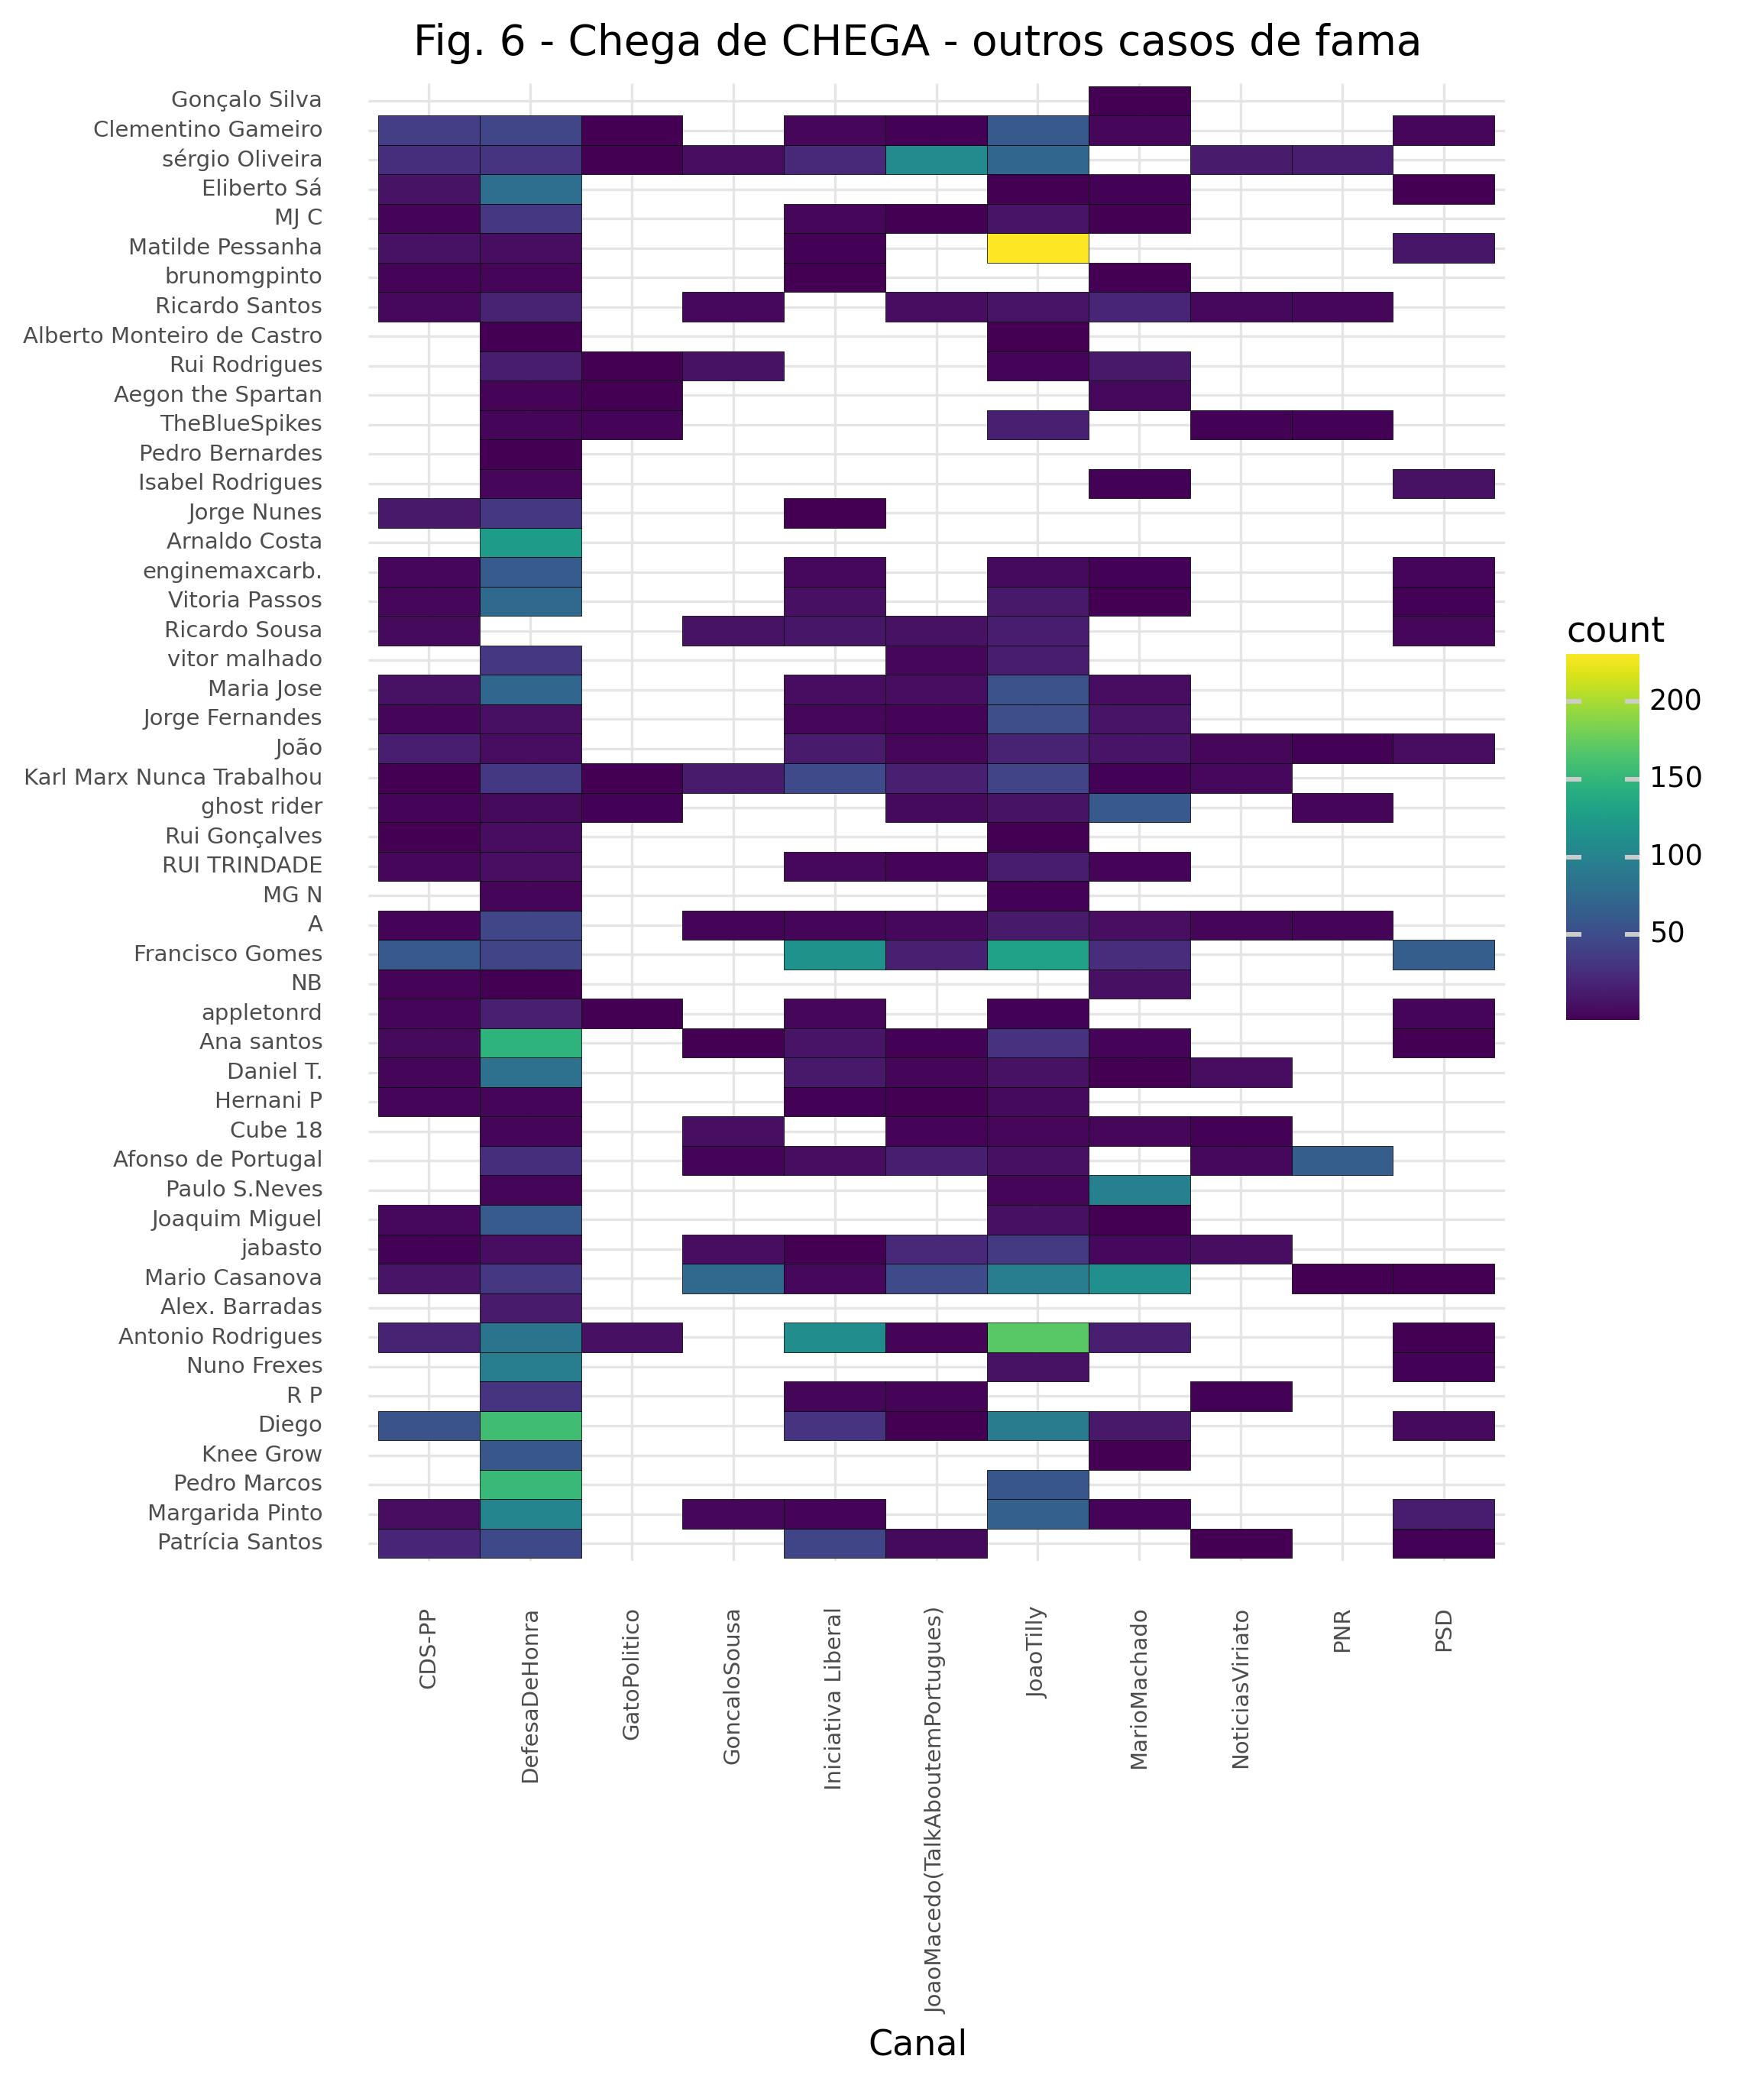

<ggplot: (8767262183537)>

In [25]:
big_commenters = {
    "url":[],
    "name":[],
    "channel":[],
    "count":[]
}
for channel in all_author_lists:
    if channel != "CHEGA.pkl":
        author_list = all_author_lists[channel]
        for author in author_list:
            if author in top_50_urls:
                big_commenters['url'].append(url)
                big_commenters['name'].append(author_list[author]['name'])
                big_commenters['channel'].append(channel[:-4])
                big_commenters['count'].append(author_list[author]['count'])
            
big_commenters_df = pd.DataFrame.from_dict(big_commenters)

(
    ggplot(big_commenters_df,aes(y='name',x='channel',fill='count')) +
    geom_tile(color='black') + 
    theme_minimal() +
    theme(aspect_ratio=1.3,
          dpi=300,
          axis_text = element_text(size=7),
          axis_text_x = element_text(angle=90,hjust=0.5)) + 
    scale_y_discrete(limits=top_50_names) +
    xlab("Canal") +
    ylab("") + 
    ggtitle("Fig. 6 - Chega de CHEGA - outros casos de fama")
)

In [26]:
all_videos_cds = read_pickle("CDS-PP.pkl")

for video in all_videos_cds:
    print(video['title'])
    print(video['url'])
    for comment in video['comments']:
        url = comment['main']['url']
        if url in top_50_urls[:10]:
            print('\t',comment['main']['author'])
            print('\t',comment['main']['main_text'])
            
    print('=================================================')

Lançamento CDSTv
https://www.youtube.com/watch?v=4l1OL0w_NcI
CDS critica cativações na Saúde / 16.02.2018
https://www.youtube.com/watch?v=_DbP7aKP1Kg
Jornal CDSTv / 23.02.2018
https://www.youtube.com/watch?v=KOQhsoNx7qk
Jornal CDSTv / 02.03.2018
https://www.youtube.com/watch?v=wWj5r7GNSyg
CDS exige devolução da taxa da Protecção Civil com juros / 16.02.2018
https://www.youtube.com/watch?v=wMFS2yL_mK8
O porquê da CDSTv
https://www.youtube.com/watch?v=4JPCOBMD3XU
Jornal CDSTv / 10.03.2018
https://www.youtube.com/watch?v=wThjWEbeDdE
Um passo à frente
https://www.youtube.com/watch?v=kSg3J3VHKyM
Intervenção do vice-presidente Adolfo Mesquita Nunes
https://www.youtube.com/watch?v=QmxAppOSyoc
Intervenção da deputada Cecília Meireles
https://www.youtube.com/watch?v=w0EHwlYD3Ho
Intervenção do deputado Filipe Lobo d'Ávila
https://www.youtube.com/watch?v=o8pdZLkGOvE
Intervenção de Diogo Feio
https://www.youtube.com/watch?v=GHfIWMB7yHQ
Apresentação do deputado João Pinho de Almeida
https://www.you

https://www.youtube.com/watch?v=UhFLUlS80wA
É notória a dimensão do empenho, trabalho e esforço das Forças Armadas junto da sociedade civil
https://www.youtube.com/watch?v=TTLEYw_kuxc
Enquanto o Estado cobra impostos, as empresas para sobreviver precisam que se compre o que produzem
https://www.youtube.com/watch?v=Z699wHl_1bw
Covid-19: Dos apoios anunciados, exatamente quanto é que já está nas mãos dos pescadores?
https://www.youtube.com/watch?v=T2oKfiGdtnE
Caxinas: O que é que é preciso fazer mais para resolver o problema das reformas dos pescadores?
https://www.youtube.com/watch?v=Rkc-lLOv8EI
Não se pode permitir a uns o que se proíbe a outros!
https://www.youtube.com/watch?v=AIB_GbujVcc
Qual é o número exato de portugueses que contactaram o Governo com o intuito de regressar ao país?
https://www.youtube.com/watch?v=W5h3oTx-lHU
Candidaturas a mais cursos, mais provas. Melhorar notas, menos. Afinal que alunos defende o governo?
https://www.youtube.com/watch?v=ucbQokgA9o8
A previsibili

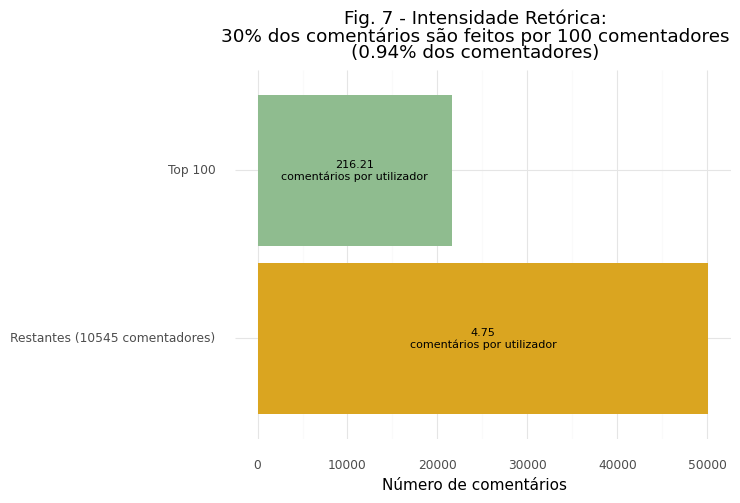

<ggplot: (-9223363269589237735)>

In [27]:
top_n = 100
plot_df = pd.DataFrame.from_dict({
    'count':[chega_authors_df.iloc[:top_n,:]['count'].sum(),chega_authors_df.iloc[top_n:,:]['count'].sum()],
    'id':["Top {}".format(top_n),"Restantes ({} comentadores)".format(chega_authors_df.shape[0] - top_n)],
    'N':[top_n,chega_authors_df.shape[0] - top_n]
})
plot_df['average'] = [
    "{}\ncomentários por utilizador".format(x) for x in np.round(plot_df['count'] / plot_df['N'],2)]

(
    ggplot(plot_df,aes(x='id',y='count',fill = 'average')) +
    geom_bar(stat='identity') + 
    geom_text(aes(y=plot_df['count']/2,
                  label='average'),
              size=8) +
    scale_fill_manual(values=['darkseagreen','goldenrod']) + 
    theme_minimal() +
    theme(legend_position='none') +
    coord_flip() +
    xlab("") + 
    ylab("Número de comentários") + 
    ggtitle(
        '\n'.join(["Fig. 7 - Intensidade Retórica:",
                   "{}% dos comentários são feitos por {} comentadores".format(
                       int(100*plot_df['count'][0]/np.sum(plot_df['count'])),top_n),
                   "({:.2f}% dos comentadores)".format(float(100*plot_df['N'][0]/np.sum(plot_df['N'])))])
    )   
)

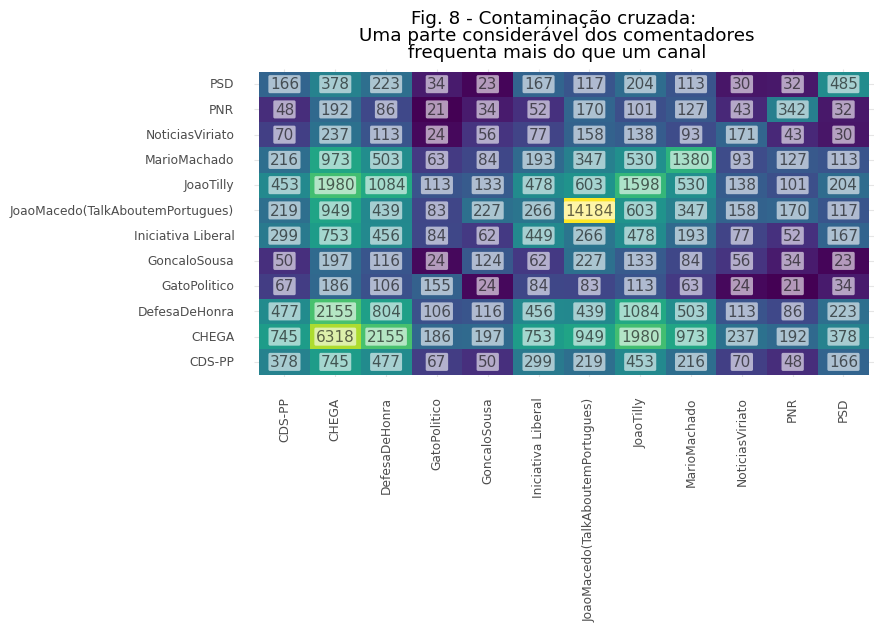

<ggplot: (-9223363269588433278)>

In [28]:
Interactions_2way = defaultdict(int) 
Exclusive = defaultdict(int)
channel_to_idx = {url:i for i,url in enumerate(all_author_lists)}
import itertools

for m in more_than_one:
    if len(more_than_one[m]) == 1:
        x = list(more_than_one[m])[0][:-4]
        Interactions_2way[x,x] += 1
    """
    for x in more_than_one[m]:
        x = x[:-4]
        Interactions_2way[x,x] += 1
    """
    for a,b in itertools.combinations(more_than_one[m],2):
        a,b = a[:-4],b[:-4]
        Interactions_2way[a,b] += 1
        Interactions_2way[b,a] += 1
      
to_df = {"A":[],"B":[],"N":[]}
for key in Interactions_2way:
    to_df["A"].append(key[0])
    to_df["B"].append(key[1])
    to_df["N"].append(Interactions_2way[key])

(
    ggplot(pd.DataFrame.from_dict(to_df),
           aes(x="A",y="B",fill="N",label="N")) + 
    geom_tile() + 
    geom_label(fill='white',
               label_r=0.,
               label_size=0,
               alpha=0.6,
               label_padding=0.1) +
    scale_fill_continuous(trans='log10') +
    ggtitle("Fig. 8 - Contaminação cruzada:\n Uma parte considerável dos comentadores\n frequenta mais do que um canal") + 
    theme_minimal() +
    xlab("") +
    ylab("") +
    theme(axis_text_x=element_text(angle=90,hjust=0.5),
          legend_position="none",
          figure_size=[8,4]) 
)